## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

print('Required Libraries Imported')

Required Libraries Imported


In [2]:
### Load the dataset

In [3]:
df = pd.read_csv('tips.csv')

#Printing the first seven rows
df.head(7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


### 1. Make a list of categorical and numerical columns in the data.

In [4]:
#intialize empty lists for categorical and numerical columns available in the data set
categorical_columns=[]
numerical_columns=[]

#iterate over the columns and determine the data type
for i in df.columns:
    if df[i].dtype == 'object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

# Print the column datas
print(' Categorical Columns are : ',categorical_columns)
print('\n Numerical Columns are : ',numerical_columns)

 Categorical Columns are :  ['sex', 'smoker', 'day', 'time']

 Numerical Columns are :  ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [5]:
print('Average Bill Amount For Each Day : \n')
avgBillAmount=df.groupby('day')['total_bill'].mean()
print(avgBillAmount)

Average Bill Amount For Each Day : 

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [6]:
avgTipByGenderWise = df.groupby('sex')['tip'].mean()
maxGenerousGender=avgTipByGenderWise.idxmax()

print(' Average Tip By Gender Wise : \n\n',avgTipByGenderWise)
print('\nThe Most Generous Gender In Giving Tips is : ',maxGenerousGender)

 Average Tip By Gender Wise : 

 sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

The Most Generous Gender In Giving Tips is :  Male


### 4. According to the data, were there more customers for dinner or lunch?

In [7]:
countBytime = df['time'].value_counts()

print('No. Of Customers Time Wise : \n\n',countBytime)
print('\nMost Customers Came in ',countBytime.idxmax(),' Time')

No. Of Customers Time Wise : 

 time
Dinner    176
Lunch      68
Name: count, dtype: int64

Most Customers Came in  Dinner  Time


### 5. Based on the statistical summary, comment on the variable 'tip'

In [8]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

- Here we can see max tip given by customer is higer than compare to the mean.

### 6. Find the busiest day in terms of the orders?

In [9]:
maxOrderCountPerDay=df['day'].value_counts().idxmax()
print('Busiest day interms of orders is ',maxOrderCountPerDay)

Busiest day interms of orders is  Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

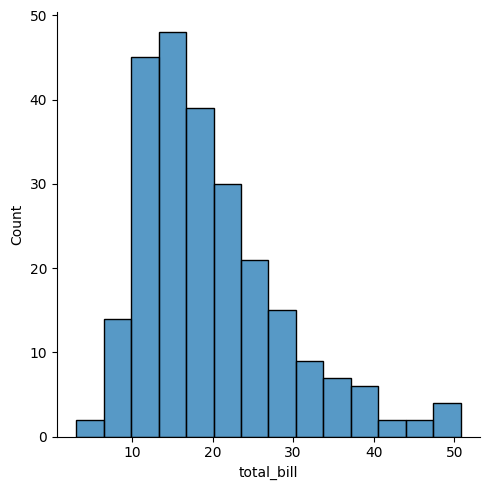

Yes , 'Total_Bill' is Rightly-Skewed and the skewness value is  1.1332130376158205


In [10]:
sns.displot(df['total_bill'])
plt.show()

skewness=df['total_bill'].skew()

if skewness > 0:
    print('Yes , \'Total_Bill\' is Rightly-Skewed and the skewness value is ',skewness)
elif skewness < 0:
    print('Yes , \'Total_Bill\' is Leftly-Skewed and the skewness value is ',skewness)
else:
    print('NO , \'Total_Bill\' is not skewed. It is Symmentric and the skewness value is ',skewness)

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

Coralation between Tip and Total Bill 

                  tip  total_bill
tip         1.000000    0.675734
total_bill  0.675734    1.000000


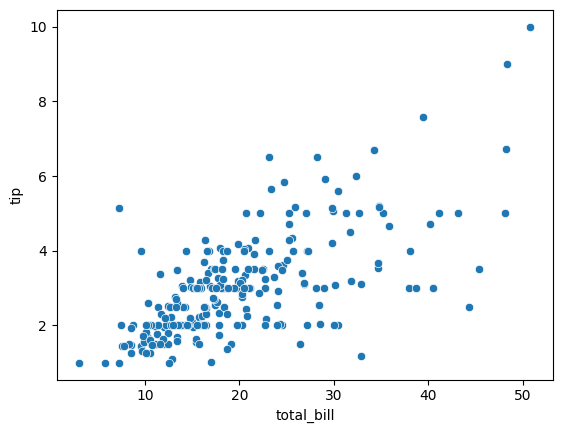

In [11]:
print('Coralation between Tip and Total Bill \n\n',df[['tip','total_bill']].corr())

sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

Yes, From The above scatter plot , we can see tip is dependent on the total bill amount. Here tip has a moderate positive correlation with the total bill, as total bill increases,tip also increases.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

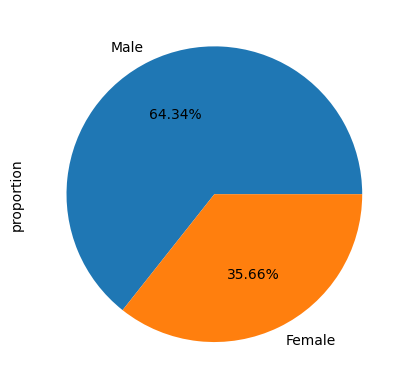

In [12]:
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

Gender Wise Smoker Count 
 smoker  No  Yes
sex            
Female  54   33
Male    97   60 



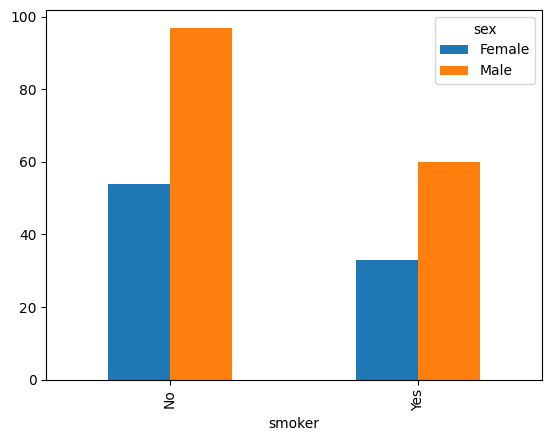

In [13]:
smokeCountsGenderWise = df.groupby(['sex', 'smoker']).size().unstack()

print('Gender Wise Smoker Count \n',smokeCountsGenderWise,'\n')

pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

Average Tip Amount For Diffrent Days
 day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64 



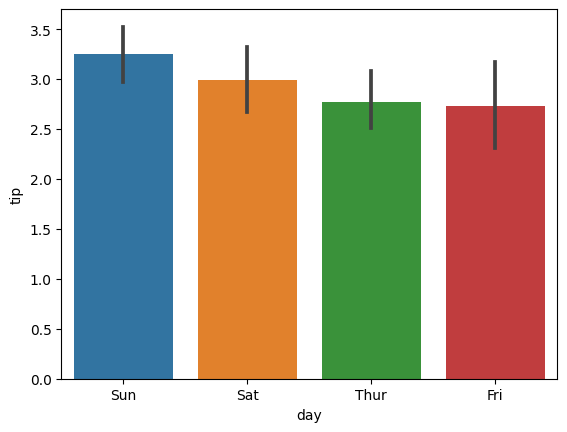

In [14]:
avgTip = df.groupby('day')['tip'].mean()

print('Average Tip Amount For Diffrent Days\n',avgTip,'\n')

sns.barplot(x='day',y='tip',data=df)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

Result
 size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64 



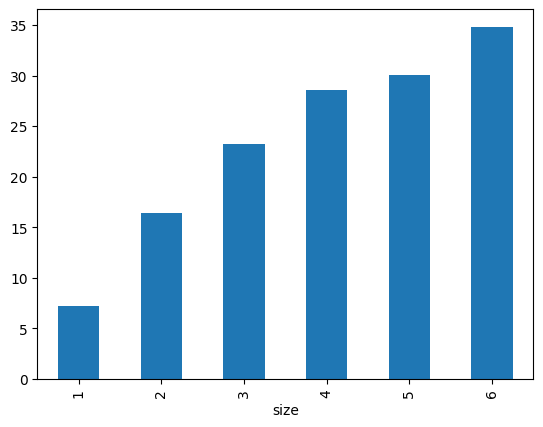

In [15]:
result = df.groupby('size')['total_bill'].mean()
result.plot(kind='bar')

print('Result\n',result,'\n')
plt.show()

- Yes average bill amount is dependent upon the size of group. From above chart, as the size of group increases the average bill amount also increases. 

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

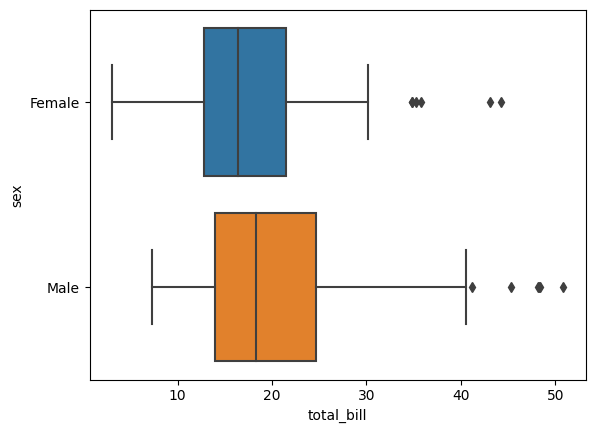

In [16]:
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [17]:
result=df.groupby(['time','day'])['total_bill'].max()

print('Result : \n',result,'\n')

maxBillOnSaturdayLunch = df[(df['day'] == 'Sat') & (df['time'] == 'Lunch')]['total_bill'].max()
maxBillOnSaturdayDinner = df[(df['day'] == 'Sat') & (df['time'] == 'Dinner')]['total_bill'].max()
maxBillOnSundayLunch = df[(df['day'] == 'Sun') & (df['time'] == 'Lunch')]['total_bill'].max()
maxBillOnSundayDinner = df[(df['day'] == 'Sun') & (df['time'] == 'Dinner')]['total_bill'].max()

print("Maximum bill amount for Saturday lunch:", maxBillOnSaturdayLunch)
print("Maximum bill amount for Saturday dinner:", maxBillOnSaturdayDinner)
print("Maximum bill amount for Sunday lunch:", maxBillOnSundayLunch)
print("Maximum bill amount for Sunday dinner:", maxBillOnSundayDinner)


Result : 
 time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64 

Maximum bill amount for Saturday lunch: nan
Maximum bill amount for Saturday dinner: 50.81
Maximum bill amount for Sunday lunch: nan
Maximum bill amount for Sunday dinner: 48.17


### 15. Compute the percentage of missing values in the dataset.

In [18]:
print("Percentage of missing values in the dataset: \n",(df.isnull().sum() / len(df)) * 100)

Percentage of missing values in the dataset: 
 total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [19]:
duplicateFound=len(df[df.duplicated()])

if duplicateFound>0:
    print('Yes, One Duplicate Record Found , dropping this record')
    df.drop_duplicates(inplace=True)
    print('Duplicate record Dropped , Now no. of duplicate record is ',len(df[df.duplicated()]))
else:
    print('No, There is no duplicate record')

Yes, One Duplicate Record Found , dropping this record
Duplicate record Dropped , Now no. of duplicate record is  0


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

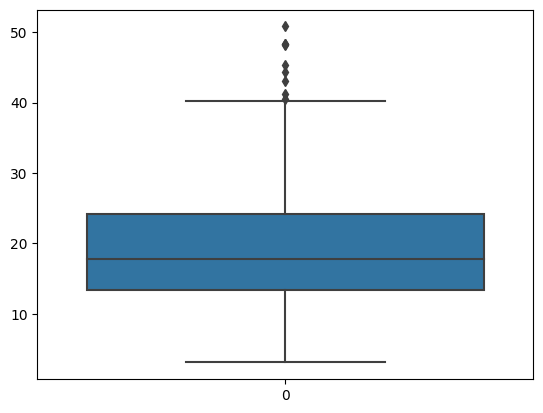

In [20]:
sns.boxplot(df['total_bill'])
plt.show()

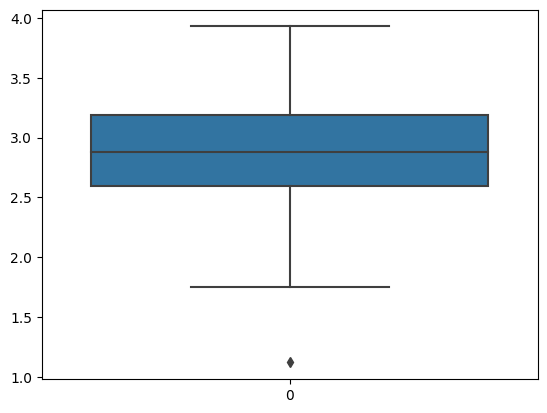

In [21]:
## treating outliers using log transformation
df['total_bill_trans'] = np.log(df['total_bill'])

## boxplot after transformation
sns.boxplot(df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

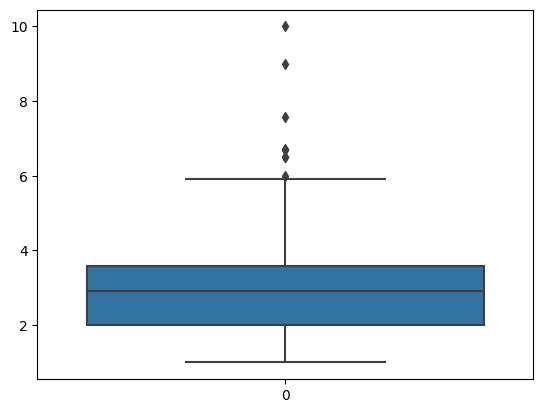

In [22]:
sns.boxplot(df['tip'])
plt.show()

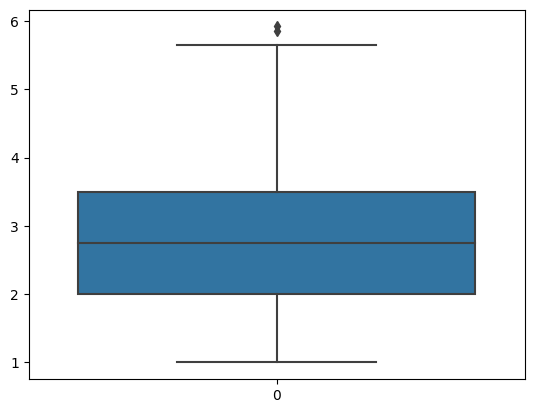

In [23]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)

df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [24]:
df = pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
217,11.59,1.50,2,2.450143,True,True,True,False,False,False
128,11.38,2.00,2,2.431857,False,False,False,False,True,True
150,14.07,2.50,2,2.644045,True,False,False,True,False,False
142,41.19,5.00,5,3.718196,True,False,False,False,True,True
104,20.92,4.08,2,3.040706,False,False,True,False,False,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [25]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max-tb_min
print(range_)

47.74


In [26]:
mm = MinMaxScaler()
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print(range_)

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [27]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [28]:
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [29]:
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [30]:
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

## Scaling the data using min max scaling
mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

(170, 8) (74, 8)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.3817809740036102


### Happy Learning:)